In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
s = ctrl.tf('s')

In [3]:
m = 0.111
R = 0.015
g = -9.8
L = 1.0
d = 0.03
J = 9.99e-6

P_ball = -m*g*d/L/(J/R**2+m)/s**2
P_ball

TransferFunction(array([0.21]), array([1, 0, 0]))

In [4]:
T, yout = ctrl.step_response(P_ball)

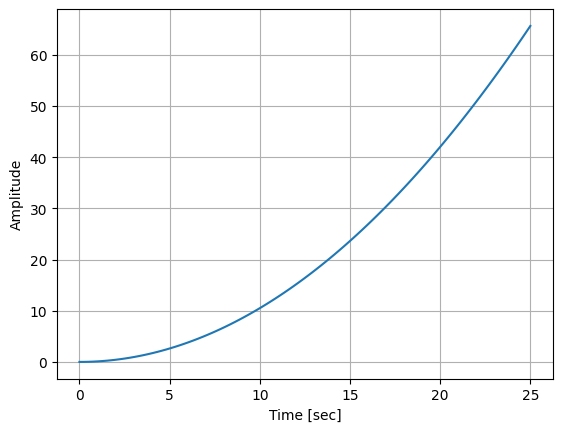

In [5]:
plt.figure()
plt.plot(T, yout)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.grid('on')
plt.show()

In [6]:
ctrl.step_info(P_ball)

{'RiseTime': nan,
 'SettlingTime': nan,
 'SettlingMin': nan,
 'SettlingMax': nan,
 'Overshoot': nan,
 'Undershoot': nan,
 'Peak': inf,
 'PeakTime': inf,
 'SteadyStateValue': nan}

| Control |    $K_{p}$   |  $\tau_{i}$ |  $\tau_{d}$  |
|:-------:|:------------:|:-----------:|:------------:|
|    P    |  0.5$K_{u}$  |   $\infty$  |       0      |
|    PI   | 0.45$K_{u}$  | $P_{u}/1.2$ |       0      |
|   PID   |  0.6$K_{u}$  |  0.5$P_{u}$ | 0.125$P_{u}$ |

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [8]:
def ball_beam_system(Ku):
    PID = Ku
    
    m = 0.111
    R = 0.015
    g = -9.8
    L = 1.0
    d = 0.03
    J = 9.99e-6

    P_ball = -m*g*d/L/(J/R**2+m)/s**2
    
    G_cl = ctrl.feedback(PID*P_ball, 1)
    
    t = np.linspace(0, 100, 1000)
    T, yout = ctrl.step_response(G_cl, T = t)
    
    plt.plot(T, yout)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.grid('minor')


In [9]:
interactive(ball_beam_system, Ku = (1e-5, 5, 0.01))

interactive(children=(FloatSlider(value=2.4900100000000003, description='Ku', max=5.0, min=1e-05, step=0.01), …

In [10]:
# P control
def ball_beam_system_P(Kp):
    PID = Kp
    
    m = 0.111
    R = 0.015
    g = -9.8
    L = 1.0
    d = 0.03
    J = 9.99e-6

    P_ball = -m*g*d/L/(J/R**2+m)/s**2
    
    G_cl = ctrl.feedback(PID*P_ball, 1)
    
    t = np.linspace(0, 100, 1000)
    T, yout = ctrl.step_response(G_cl, T = t)

    plt.plot(T, yout)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.grid('on')


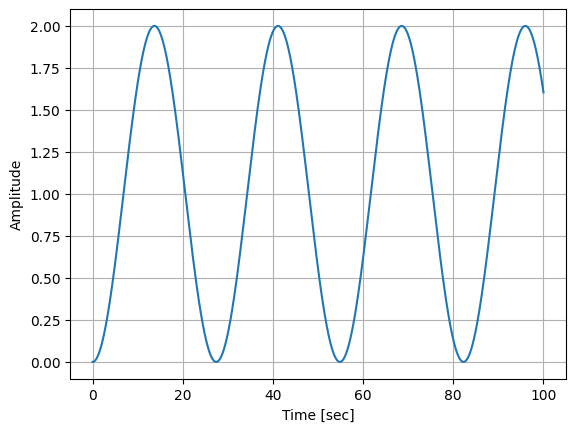

In [11]:
# P control
%matplotlib inline

Ku = 0.5
Kp = 0.5*Ku
ball_beam_system_P(Kp)

In [12]:
# PI control
def ball_beam_system_PI(Kp, tau_i):
    PID = Ku*(1 + 1/(tau_i*s))
    
    m = 0.111
    R = 0.015
    g = -9.8
    L = 1.0
    d = 0.03
    J = 9.99e-6

    P_ball = -m*g*d/L/(J/R**2+m)/s**2
    
    G_cl = ctrl.feedback(PID*P_ball, 1)
    
    t = np.linspace(0, 100, 1000)
    T, yout = ctrl.step_response(G_cl, T = t)
    
    plt.plot(T, yout)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.grid('on')

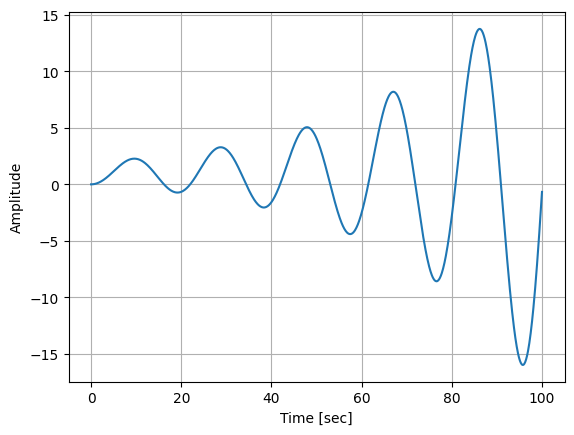

In [13]:
Ku = 0.5
Kp = 0.45*Ku

Pu = 38.75 - 19.35
tau_i = Pu/1.2
ball_beam_system_PI(Kp, tau_i)

In [14]:
# PID control
def ball_beam_system_PID(Kp, tau_i, tau_d):
    PID = Ku*(1 + 1/(tau_i*s) + tau_d*s)
    
    m = 0.111
    R = 0.015
    g = -9.8
    L = 1.0
    d = 0.03
    J = 9.99e-6

    P_ball = -m*g*d/L/(J/R**2+m)/s**2
    
    G_cl = ctrl.feedback(PID*P_ball, 1)
    
    t = np.linspace(0, 100, 1000)
    T, yout = ctrl.step_response(G_cl, T = t)
    
    plt.plot(T, yout)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.grid('on')

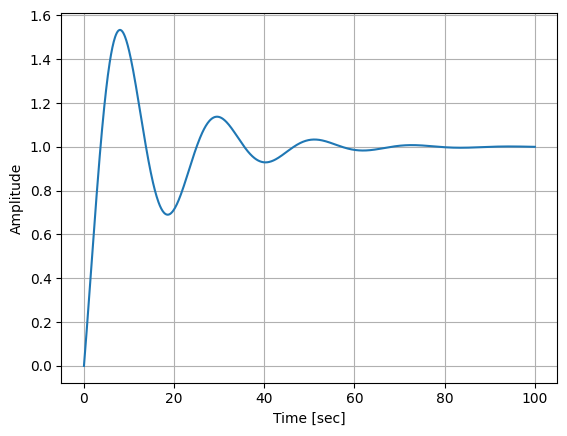

In [15]:
Ku = 0.5
Kp = 0.6*Ku

Pu = 38.75 - 19.35
tau_i = Pu/2
tau_d = 0.125*Pu
ball_beam_system_PID(Kp, tau_i, tau_d)